<a href="https://colab.research.google.com/github/carmenscar/Mind_lab_data/blob/master/analiseRtribcovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pywaffle -q

from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import calendar
from pywaffle import Waffle

#Avaliação Econômica do DF na pandemia por meio de Receitas Tributárias de Impostos.
O Distrito Federal (DF), assim como os demais entes da Federação, sofreu o impacto de perdas econômicas e emocionais durante a pandemia do Covid-19.

O DF foi um dos primeiros entes a adotarem o isolamento social, no final de março, o que levou muitos ao teletrabalho e outros ao desemprego face ao fechamento de vários estabelecimentos que não conseguiram sustentar o ônus financeiro do isolamento.

O ente tem competência tributária híbrida, acumulando competências dos estados e municípios, recolhendo assim tanto tributos estaduais (ICMS, IPVA, ITCMD) como municipais (ISS, IPTU, ITBI).

A arrecadação tributária reflete o nível de economia: um maior nível de comércio e serviços está diretamente relacionado com uma maior arrecadação de receitas tributárias. 

Dessa forma, se há uma maior circulação de mercadorias, há uma maior receita tributária de ICMS, assim como, uma maior prestação de serviços gera maior receita tributária de ISS.

Esta análise busca avaliar a situação econômica do comércio e dos serviços prestados na capital diante da pandemia por meio da observação da arrecadação tributária.

Os dados utilizados foram retirados do site do [GDF](http://www1.seplag.df.gov.br/receita-tributaria-df/).

In [ ]:
df1 = pd.read_excel('/content/ICMS.xlsx')
df2 = pd.read_excel('/content/impostos.xlsx')
df3 = pd.read_excel('/content/ISS.xlsx')


##Limpeza e modelagem dos dados

Nesse tópico, buscou-se ajustar o dataframe para facilitar a análise dos dados.

Caso queira ver apenas a análise, pule para o próximo tópico "Análise e Exploração dos Dados".

In [ ]:
df1.head(1)

,Tributo,Conta sintetica,Atividade,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
0,ICMS,COMBUSTIVEIS,COMBUSTIVEIS,151157.4,166785.5,130812.2,111768.5,139128.7,148970.6,144563.3,133967.5,137639.9,130618.5,136866.9,140639.0,137790.3,123764.1,135456.2,105091.6,65192.4


In [ ]:
df2.head(1)

,ANO/MÊS,IR,IPTU,IPVA,ITCD,ITBI,ICMS,ISS,Outros Impostos (1),Taxas,TLP (2),Outras_Taxas,SIMPLES NACIONAL,DÍVIDA ATIVA
0,2015-01-01,273012.1,18867.4,40134.6,8576.2,29246.7,778514.0,154172.8,824.8,21466.9,5256.3,16210.6,10220.9,1917.0


In [ ]:
df3.head(1)

,ID,Tributo,Atividade,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00,2019-07-01 00:00:00,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00
0,1,ISS,ADVOCACIA,3502.0,2448.6,2170.0,2471.6,2482.7,3018.5,3358.3,2721.6,2689.3,3147.8,3328.0,3070.6,3276.32,2545.77,2438.95,1693.33,2028.96


In [ ]:
#Organizando os dados
ICMSana = (((((df1.iloc[:,2:])).set_index("Atividade")).T).reset_index()).rename(columns={"index": "Data"})
ICMSana['ano'] = ICMSana['Data'].dt.year
ICMSana['mês'] = ICMSana['Data'].dt.month

ICMSsint = (((pd.pivot_table(df1, index=['Conta sintetica'], aggfunc=np.sum)).T).reset_index()).rename(columns={"index": "Data"})
ICMSsint['ano'] = ICMSsint['Data'].dt.year
ICMSsint['mês'] = ICMSsint['Data'].dt.month

ISSdf = ((((df3.iloc[:,2:]).set_index("Atividade")).T).reset_index()).rename(columns={"index": "Data"})
ISSdf["mês"] = ISSdf["Data"].dt.month
ISSdf["ano"] = ISSdf["Data"].dt.year

df2["ano"] = df2["ANO/MÊS"].dt.year
df2["mês"] = df2["ANO/MÊS"].dt.month
impostosdf = df2

In [ ]:
#Dataframe sintético do ICMS
ICMSsint.head(1)

Conta sintetica,Data,AGROPECUÁRIA,COMBUSTIVEIS,COMUNICACAO,COMÉRCIO ATACADISTA,COMÉRCIO VAREJISTA,ENERGIA ELETRICA,INDÚSTRIA,SERVIÇOS,VEICULOS,ano,mês
0,2019-01-01,7217.5,151157.4,80929.5,131394.6,143997.3,3570.4,84339.9,6636.1,42290.1,2019,1


In [ ]:
#Dataframe analítico do ICMS
ICMSana.head(1)

Atividade,Data,COMBUSTIVEIS,COMUNICACAO,ENERGIA ELETRICA,VEICULOS,AGROPECUÁRIA,Alimentos,Bebidas,Cimento,Higiene e Cosméticos,Medicamentos,Móveis,Outros,Tintas,Alimentos,Autopeças,Bebidas,Fumo,Higiene e Cosméticos,Material de Construção,Medicamentos,Móveis,Outros,Produtos Eletrônicos e de Informática,Vestuário e Calçados,Autopeças,Bebidas,Higiene e Cosméticos,Hipermercados,Lojas de Departamentos,Material de Construção,Medicamentos,Móveis,Outros,Produtos Eletrônicos e de Informática,"Bares, Restaurantes e Lanchonetes",Vestuário e Calçados,Outros,Transporte Interestadual e Intermunicipal,ano,mês
0,2019-01-01,151157.4,80929.5,3570.4,42290.1,7217.5,8439.3,44182.5,4431.2,375.5,3934.0,1211.8,18940.8,2824.8,34095.0,7480.0,32214.3,9833.9,8638.7,5416.7,14101.5,256.6,12843.2,5803.8,710.9,902.4,541.6,2531.7,23218.4,11715.6,8328.9,8693.3,4168.3,26127.0,15787.0,9447.0,32536.1,721.8,5914.3,2019,1


In [ ]:
#Dataframe ISS
ISSdf.head(1)

Atividade,Data,ADVOCACIA,AGENCIAMENTO DE MÃO-DE-OBRA E SIMILARES,"ALUGUEL DE MÁQUINAS, EQUIPAMETOS E OUTROS",ASSISTÊNCIA SOCIAL,CADASTRAIS,ATIVIDADES DE ORGANIZAÇÕES E ASSOCIAÇÕES,ATIVIDADES DE TELEATENDIMENTO,"ATIVIDADES PROFISSIONAIS, CIENTIFICAS E TECNIC",CABELEIREIROS E SIMILARES,CARTÓRIOS,COMUNICAÇÃO,CONDICIONAMENTO FISICO,CONSTRUÇÃO CIVIL,CONSULTORIA E CONTABILIDADE,DEPÓSITOS DE MERCADORIAS,DIVERSÕES,ENSINO,ESTACIONAMENTOS DE VEÍCULOS,FUNERÁRIAS,GRÁFICA E EDITORAÇÃO,"HOLDINGS, ADMINISTRAÇÃO DE FUNDOS E GESTÃ",HOTELARIA,IMOBILIÁRIA,INFORMÁTICA,INSTITUIÇÕES FINANCEIRAS E DE SEGURO,LAVANDERIAS,LIMPEZA,LOCAÇÃO E CONSIGNAÇÃO DE VEÍCULOS,MANUTENÇÃO E ASSISTÊNCIA TÉCNICA,OPERAÇÕES AEROPORTOS,ORGANIZAÇÕES DE FESTAS E EVENTOS,OUTROS SERVIÇOS,OUTROS SETORES,"PROFISSIONAIS AUTONOMOS , EXCETO ADVOGADO",PUBLICIDADE,RECUPERAÇÃO E REFORMA DE,REPARAÇÃO E REBOQUE DE VEÍCULOS,REPRESENTAÇÃO COMERCIAL,SANEAMENTO BÁSICO,SAÚDE E VETERINÁRIA,SEGURANÇA,SERVIÇO PÚBLICO,PREDIAIS,SERVIÇOS DE APOIO ADMINISTRATIVO,"SERVIÇOS DE INSTALÇAO, MANUTENÇÃO E MEDIÇÃ",TRANSPORTE,TURISMO,"VÍDEO, FOTO E SIMILARES",mês,ano
0,2019-01-01,3502.0,1194.6,425.7,626.0,382.8,3398.4,426.6,3238.4,764.9,977.6,4366.2,732.7,4735.9,3317.7,212.3,688.7,5889.2,951.5,174.8,720.0,542.7,1968.2,2003.3,13408.8,50273.5,190.1,1023.9,158.7,3353.2,1800.8,802.2,107.7,1456.6,1253.9,2079.5,18.5,2265.8,823.3,51.6,11580.6,1925.3,140.4,291.5,4068.1,206.6,2159.8,1264.4,449.3,1,2019


In [ ]:
#Dataframe impostos
impostosdf.head(1)

,ANO/MÊS,IR,IPTU,IPVA,ITCD,ITBI,ICMS,ISS,Outros Impostos (1),Taxas,TLP (2),Outras_Taxas,SIMPLES NACIONAL,DÍVIDA ATIVA,ano,mês
0,2015-01-01,273012.1,18867.4,40134.6,8576.2,29246.7,778514.0,154172.8,824.8,21466.9,5256.3,16210.6,10220.9,1917.0,2015,1


##Análise e exploração dos dados




###Impostos em geral
O Gráfico 1 demonstra a arrecadação, de 2015 a 2020, das receitas de impostos do Imposto de Renda(IR), Imposto sobre Circulação de Mercadorias e Serviços (ICMS), Imposto sobre Servços de Qualquer Natureza (ISS) e o Simples Nacional, tributação simplificada para micro e pequenas empresas.

O Gráfico 1 ainda evidencia que, com exceção da arrecadação do IR, todos os impostos tiveram quedas severas a partir de março de 2020 em relação às suas médias e às suas cotações anteriores.

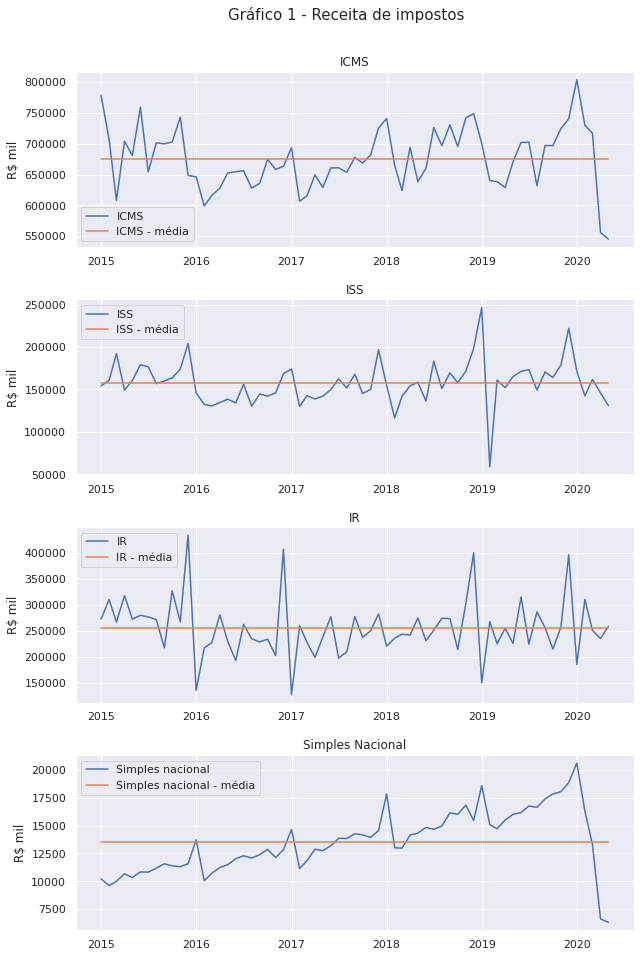

<Figure size 720x720 with 0 Axes>

In [ ]:
df2['ICMSm'] = df2.ICMS.mean()
df2['ISSm'] = df2.ISS.mean()
df2['IRm'] = df2.IR.mean()
df2['Simplesm'] = df2["SIMPLES NACIONAL"].mean()

sns.set()
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10,15))
plt.figure(figsize=(10,10))
fig.suptitle('Gráfico 1 - Receita de impostos',fontsize=15)
fig.subplots_adjust(hspace=0.3,top=0.92)

ax1.plot(df2["ANO/MÊS"], df2.ICMS, label="ICMS")
ax1.plot(df2["ANO/MÊS"], df2.ICMSm, label="ICMS - média")
ax1.set_ylabel('R$ mil')
ax1.set_title('ICMS')
ax1.legend()
ax1.grid(True)

ax2.plot(df2["ANO/MÊS"], df2.ISS, label="ISS")
ax2.plot(df2["ANO/MÊS"], df2.ISSm, label="ISS - média")
ax2.set_ylabel('R$ mil')
ax2.set_title('ISS')
ax2.legend()
ax2.grid(True)

ax3.plot(df2["ANO/MÊS"], df2.IR, label="IR")
ax3.plot(df2["ANO/MÊS"], df2.IRm, label="IR - média")
ax3.set_ylabel('R$ mil')
ax3.set_title('IR')
ax3.legend()
ax3.grid(True)

ax4.plot(df2["ANO/MÊS"], df2["SIMPLES NACIONAL"], label="Simples nacional")
ax4.plot(df2["ANO/MÊS"], df2.Simplesm, label="Simples nacional - média")
ax4.set_ylabel('R$ mil')
ax4.set_title('Simples Nacional')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show();

Conforme observado, as arrecadações seguem uma mesma tendência ao longo do tempo.

Dessa forma, foi escolhido o ano de 2019 para a demonstração da composição das receitas tributárias.

Observou-se que a maior parte da arrecadação (50,5%) advém da receita de comércio de bens e de serviços de transportes interestadual e intermunicipal, além dos serviços de comunicação onerosos, todos dentro do campo de incidência do ICMS. 

Essa informação corroborada pela Tabela 1 e evidenciada também no Gráfico 2.

Cumpre salientar que o IR é um imposto de competência da União, porém pertence aos estados e ao DF o imposto de renda que incide na folha de pagamento de seus próprios servidores, que têm certa estabilidade para desempenhar suas funções públicas não sofrendo com as demissões durante a pandemia como na iniciativa privada. Desta forma, sua arrecadação manteve-se estável ao longo da pandemia, de acordo com os dados.


In [ ]:
#Agregando a arrecadação de 2019
impostos2019 = df2[df2["ano"] == 2019]
impostos2019 = {"IR": impostos2019.IR.sum(),
           "IPTU": impostos2019.IPTU.sum(),
           "IPVA":impostos2019.IPVA.sum(),
           "ICMS": impostos2019.ICMS.sum(),
           "ISS":impostos2019.ISS.sum(),
            "ITCD" : impostos2019.ITCD.sum(),
            "ITBI" : impostos2019.ITBI.sum()}


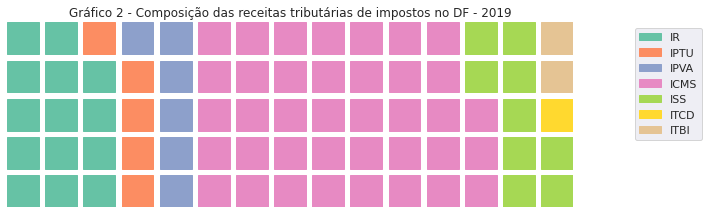

In [ ]:

fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                values=(impostos2019),icon_size=20,
                 figsize=(10,5),
                legend={'loc': 'upper left',
                        'bbox_to_anchor': (1.1, 1)}
                )
plt.title("Gráfico 2 - Composição das receitas tributárias de impostos no DF - 2019")
plt.show();

In [ ]:
#Tabela  - Composição das receitas tributárias Referência 2019
impostos2019 = (pd.DataFrame.from_dict(impostos2019, orient='index',columns=['R$'])).reset_index()
impostos2019["%"] = impostos2019['R$'] / (impostos2019['R$'].sum())*100
impostos2019

,index,R$,%
0,IR,3080033.5,19.031643
1,IPTU,1040544.2,6.429562
2,IPVA,1314322.9,8.121251
3,ICMS,8173794.3,50.506183
4,ISS,2013620.1,12.442235
5,ITCD,146413.9,0.904697
6,ITBI,415020.8,2.564429


###ICMS
Gráfico 3 evidencia o comportamento da arrecadação ao longo da série temporal, a tendência, a sazonalidade e o resíduo.

O subgráfico de tendência mostra que a partir de 2016 ouve uma tendência de crescimento da arrecadação do ICMS.

O subgráfico de sazonalidade mostra um crescimento do ICMS ao longo do ano, evidenciando que a arrecadação segue um padrão. Essa sazonalidade média pode ser observada também no Gráfico 4.

O subgráfico de resíduo evidencia o que sobra de uma série temporal quando retiramos a sazonalidade e a tendência, ou seja, o ruido é uma parte aleatória não correlacionada do conjunto de dados.

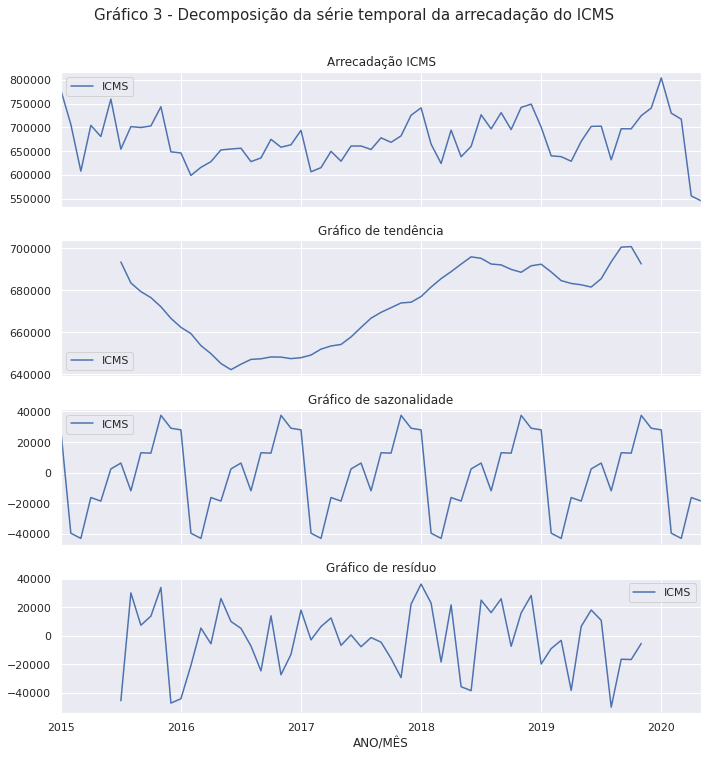

In [ ]:
result = seasonal_decompose((df2.loc[:, ['ANO/MÊS','ICMS']]).set_index('ANO/MÊS'))

fig, (ax1,ax2,ax3, ax4) = plt.subplots(4,1, figsize=(10,10), sharex=True)
ttl = fig.suptitle('Gráfico 3 - Decomposição da série temporal da arrecadação do ICMS',fontsize=15)
ttl.set_position([.5, 1.05])
fig.subplots_adjust(top=0.9)

result.observed.plot(ax=ax1)
ax1.set_title('Arrecadação ICMS')
result.trend.plot(ax=ax2)
ax2.set_title('Gráfico de tendência')
result.seasonal.plot(ax=ax3)
ax3.set_title('Gráfico de sazonalidade')
result.resid.plot(ax=ax4)
ax4.set_title('Gráfico de resíduo')
plt.tight_layout()
plt.show()

In [ ]:
result2 = (df2.loc[:, ['ANO/MÊS','ICMS']]).set_index('ANO/MÊS').reset_index()
result2['mês'] = result2['ANO/MÊS'].dt.month

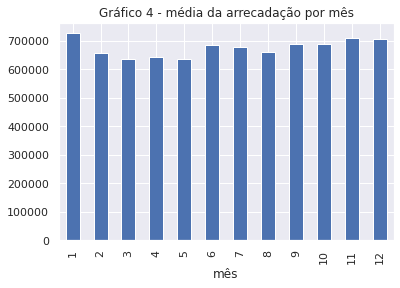

In [ ]:
#As variáveis do eixo X correspondem aos meses do ano
result2.groupby('mês').ICMS.mean().plot.bar()
plt.title('Gráfico 4 - média da arrecadação por mês');

Da arrecadação do ICMS, a maior parte é de combustíveis (22,4%), do Comércio atacadista (20,8%) e varejista (17,2%), de serviços de comunicação onerosa (12,1%) e das indústrias (14,4%), conforma evidenciado na Tabela 2.

In [ ]:
#Tabela 2 - Arrecadação do ICMS 2019
icms2019 = ICMSsint[ICMSsint["ano"] == 2019]
icms2019 = {'AGROPECUÁRIA' : icms2019['AGROPECUÁRIA'].sum(), 'COMBUSTIVEIS': icms2019['COMBUSTIVEIS'].sum(), 'COMUNICACAO': icms2019['COMUNICACAO'].sum(),
       'COMÉRCIO ATACADISTA': icms2019['COMÉRCIO ATACADISTA'].sum(), 'COMÉRCIO VAREJISTA': icms2019['COMÉRCIO VAREJISTA'].sum(), 'ENERGIA ELETRICA':icms2019['ENERGIA ELETRICA'].sum(),
       'INDÚSTRIA':icms2019['INDÚSTRIA'].sum(), 'SERVIÇOS':icms2019['SERVIÇOS'].sum(), 'VEICULOS': icms2019['VEICULOS'].sum()}
icms2019 = pd.DataFrame.from_dict(icms2019, orient='index',columns=['R$'])
icms2019["%"] = (icms2019['R$'] / icms2019['R$'].sum())*100
icms2019

,R$,%
AGROPECUÁRIA,26856.2,0.359810
COMBUSTIVEIS,1672918.0,22.413199
COMUNICACAO,906351.1,12.142991
COMÉRCIO ATACADISTA,1557522.0,20.867162
COMÉRCIO VAREJISTA,1286812.2,17.240282
ENERGIA ELETRICA,331628.0,4.443042
INDÚSTRIA,1078306.7,14.446795
SERVIÇOS,71858.3,0.962734
VEICULOS,531733.2,7.123985


Para analisar a variação da arrecadação do ICMS decorrente da pandemia do COVID-19, comparamos a arrecadação acumulada até maio de 2019 com o acumulado até maio 2020 em decorrência dos dados disponíveis.

O Gráfico 5 e a Tabela 3 evidenciam a queda na arrecadação de todos os setores, exceto sobre o comércio atacadista e sobre a energia elétrica.

Os volumes de arrecadação de energia elétrica mostram um *gap* muito grande de arrecadação, evidenciada também na tabela 4.2 elaborada pelo [GDF (Fonte: SITAF)](http://www1.seplag.df.gov.br/wp-conteudo/uploads/2020/04/Series-Historicas-maio.pdf). 

Assim, a informação de arrecadação de ICMS sobre energia elétrica carece de maior entendimento e pode apontar uma inconsistência no momento da disponibilização dos dados.

Embora haja um aumento natural no consumo em decorrência das pessoas estarem mais dentro de casa, o aumento intenso na arrecadação da energia elétrica ocorre desde janeiro de 2020.

As arrecadações que tiveram maior queda foram as sobre o comércio de combustíveis (-23,3%) e o comércio varejista (-16,9%). Essas quedas podem ser maiores se observados apenas os meses de maio ao invés do acumulado até maio, dado que a economia funcionava normalmente até meados de março de 2020.

O comércio de combustíveis é responsável por 22,4% da arrecadação do ICMS, fazendo com que essa queda tenha um impacto significativo na arrecadação total.

O Gráfico 6 evidencia o ínicio da queda na arrecadação do ICMS junto com o início da pandemia.

In [ ]:
ICMSmay2019_df = ICMSsint[(ICMSsint["mês"] <= 5) & (ICMSsint['ano'] == 2019)]
ICMSmay2020_df = ICMSsint[(ICMSsint["mês"] <= 5) & (ICMSsint['ano'] == 2020)]

In [ ]:
ICMSmay2019 = {'AGROPECUÁRIA' : ICMSmay2019_df['AGROPECUÁRIA'].sum(), 'COMBUSTIVEIS': ICMSmay2019_df['COMBUSTIVEIS'].sum(),
               'COMUNICACAO': ICMSmay2019_df['COMUNICACAO'].sum(),'COMÉRCIO ATACADISTA': ICMSmay2019_df['COMÉRCIO ATACADISTA'].sum(),
               'COMÉRCIO VAREJISTA': ICMSmay2019_df['COMÉRCIO VAREJISTA'].sum(), 'ENERGIA ELETRICA':ICMSmay2019_df['ENERGIA ELETRICA'].sum(),
               'INDÚSTRIA':ICMSmay2019_df['INDÚSTRIA'].sum(), 'SERVIÇOS':ICMSmay2019_df['SERVIÇOS'].sum(),
               'VEICULOS': ICMSmay2019_df['VEICULOS'].sum()}
ICMSmay2020 = {'AGROPECUÁRIA' : ICMSmay2020_df['AGROPECUÁRIA'].sum(), 'COMBUSTIVEIS': ICMSmay2020_df['COMBUSTIVEIS'].sum(),
               'COMUNICACAO': ICMSmay2020_df['COMUNICACAO'].sum(),'COMÉRCIO ATACADISTA': ICMSmay2020_df['COMÉRCIO ATACADISTA'].sum(),
               'COMÉRCIO VAREJISTA': ICMSmay2020_df['COMÉRCIO VAREJISTA'].sum(), 'ENERGIA ELETRICA':ICMSmay2020_df['ENERGIA ELETRICA'].sum(),
               'INDÚSTRIA':ICMSmay2020_df['INDÚSTRIA'].sum(), 'SERVIÇOS':ICMSmay2020_df['SERVIÇOS'].sum(), 'VEICULOS': ICMSmay2020_df['VEICULOS'].sum()}

In [ ]:
ICMSmay2019 = pd.DataFrame.from_dict(ICMSmay2019, orient='index',columns=['acumulado até maio-19'])
ICMSmay2020 = pd.DataFrame.from_dict(ICMSmay2020, orient='index',columns=['acumulado até maio-20'])

In [ ]:
#Tabela 3 - Arrecadação do ICMS acumulado até maio - 2019 e 2020
ICMSactab = pd.concat([ICMSmay2019['acumulado até maio-19'],ICMSmay2020['acumulado até maio-20']], axis=1,sort=False)
ICMSactab['Variação %'] = (100-((ICMSactab['acumulado até maio-19']*100)/ICMSactab['acumulado até maio-20']))
ICMSactab['Variação R$'] = ICMSactab['acumulado até maio-20']-ICMSactab['acumulado até maio-19']

ICMSactab.sort_values(by='Variação R$')


,acumulado até maio-19,acumulado até maio-20,Variação %,Variação R$
COMBUSTIVEIS,699652.3,567294.6,-23.331387,-132357.7
COMÉRCIO VAREJISTA,545682.5,466642.0,-16.938145,-79040.5
COMUNICACAO,386743.2,349694.5,-10.594590,-37048.7
VEICULOS,201747.3,174145.0,-15.850182,-27602.3
INDÚSTRIA,419592.2,395673.6,-6.045033,-23918.6
AGROPECUÁRIA,11056.6,8611.9,-28.387464,-2444.7
SERVIÇOS,29098.4,27705.8,-5.026384,-1392.6
COMÉRCIO ATACADISTA,637378.3,644455.2,1.098121,7076.9
ENERGIA ELETRICA,98003.8,388524.4,74.775381,290520.6


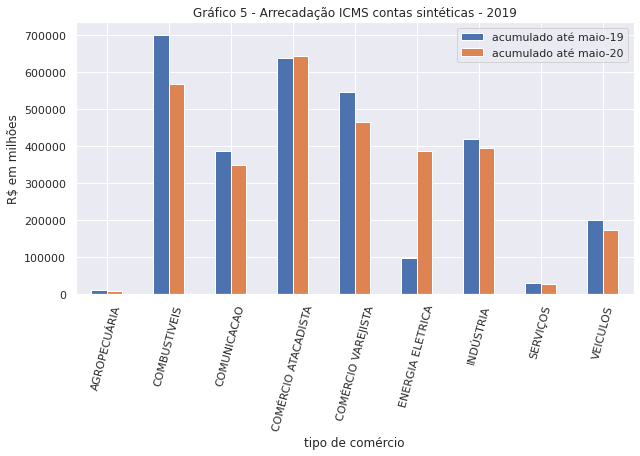

In [ ]:
sns.set()
(ICMSactab.drop(columns=['Variação %','Variação R$'],axis=1)).plot(kind='bar', figsize=(10,5))
plt.xlabel('tipo de comércio')
plt.ylabel('R$ em milhões')
plt.title('Gráfico 5 - Arrecadação ICMS contas sintéticas - 2019')
plt.xticks(rotation=75);

In [ ]:
impostosac2019 = df2[(df2['ano'] == 2019) & (df2['mês']<=5)]
impostosac2020 = df2[(df2['ano'] == 2020) & (df2['mês']<=5)]

In [ ]:
impostosac2019['mês'] = impostosac2019['mês'].apply(lambda x: calendar.month_name[x])
impostosac2020['mês'] = impostosac2020['mês'].apply(lambda x: calendar.month_name[x])

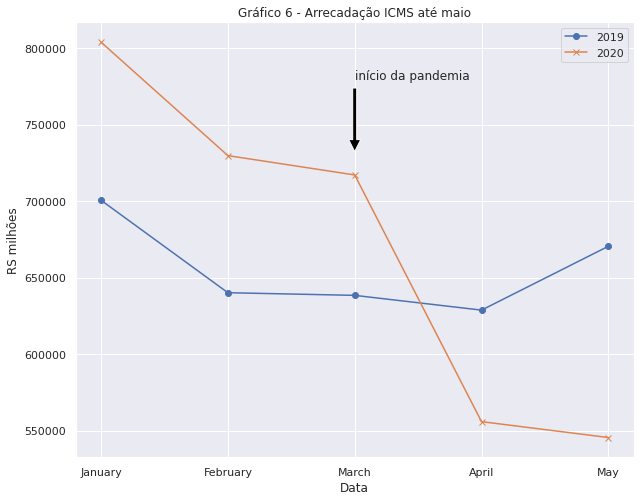

In [167]:
plt.figure(figsize=(10, 8))
plt.plot(impostosac2019['mês'], impostosac2019['ICMS'], marker='o', label = '2019')
plt.plot(impostosac2020['mês'], impostosac2020['ICMS'], marker='x',  label = '2020')
plt.annotate('início da pandemia', xy=('March', 730000),xytext=('March', 780000),
             arrowprops=dict(facecolor='black', shrink=0.05),
             )
plt.xlabel('Data'); 
plt.ylabel('RS milhões'); 
plt.title('Gráfico 6 - Arrecadação ICMS até maio')
plt.legend();

A arrecadação do ICMS no comércio varejista, que representa aproximadamente 17% de toda a arrecadação, teve queda nos primeiros 5 meses de 2020, comparada com os primeiros 5 meses de 2019 (acumulado até maio). 

A queda foi observada principalmente na arrecadação do ICMS sobre Bares, restaurantes e lanchonete (-34,9%), sobre as lojas de departamento (-19%) e sobre uma agregação de outros (Outros) bens que possuem incidência tributária não detalhada, conforme evidenciado no Gráfico 7 e na Tabela 4.

No comércio atacadista a maior queda foi na venda de bebidas (-11%) e bens relacionados a Higiene e cosméticos (-15%), conforme o Gráfico 8 e Tabela 5.

Apesar de ter havido uma queda na arrecadação dos medicamentos na indústria (-13%), o mesmo não ocorreu no comércio  atacadista, que cresceu 6%, enquanto o comércio varejista manteve-se estável até maio de 2019, Conforme Gráfico 9 e Tabela 6.

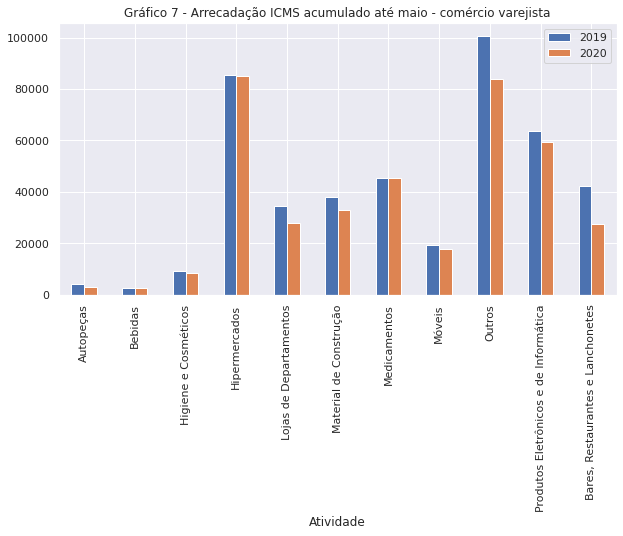

In [ ]:
#Analisando Comércio Varejista na pandemia - ICMS
cvarejo = (((df1[df1['Conta sintetica'] == 'COMÉRCIO VAREJISTA'].iloc[:,2:]).set_index("Atividade")).T).reset_index()
cvarejo["ano"] = cvarejo["index"].dt.year
cvarejo["mês"] = cvarejo["index"].dt.month
cv2019 = (cvarejo[(cvarejo['ano']== 2019) & (cvarejo['mês'] <=5 )]).iloc[:,:12]
cv2020 = (cvarejo[(cvarejo['ano']== 2020) & (cvarejo['mês'] <=5 )]).iloc[:,:12]
graf7 = pd.concat([cv2019.sum(),cv2020.sum()],axis=1).plot.bar(figsize=(10,5))
graf7.legend(["2019", "2020"])
graf7.set_title('Gráfico 7 - Arrecadação ICMS acumulado até maio - comércio varejista');

In [ ]:
#Tabela 4 - Arrecadação do ICMS do Comércio Varejista acumulado até maio - 2019 e 2020
cv2019ac = pd.DataFrame(data=(cv2019.sum()), columns=['acumulado até maio-19'])
cv2020ac = pd.DataFrame(data=(cv2020.sum()), columns=['acumulado até maio-20'])

cvtab = pd.concat([cv2019ac, cv2020ac], axis=1, join="inner")
cvtab['Variação R$'] = cvtab['acumulado até maio-20'] - cvtab['acumulado até maio-19']
cvtab['Variação %'] = (((cvtab['acumulado até maio-20']*100)/cvtab['acumulado até maio-19'])-100)

cvtab.sort_values(by='Variação R$')

,acumulado até maio-19,acumulado até maio-20,Variação R$,Variação %
Atividade,,,,
Outros,100613.3,83838.7,-16774.6,-16.672348
"Bares, Restaurantes e Lanchonetes",42447.1,27641.8,-14805.3,-34.879415
Lojas de Departamentos,34631.5,27786.8,-6844.7,-19.764376
Material de Construção,37820.9,33002.9,-4818.0,-12.738988
Produtos Eletrônicos e de Informática,63720.4,59524.9,-4195.5,-6.584234
Móveis,19428.1,17819.4,-1608.7,-8.280274
Autopeças,4103.4,3196.5,-906.9,-22.101184
Higiene e Cosméticos,9441.4,8568.1,-873.3,-9.249688
Hipermercados,85446.1,85066.1,-380.0,-0.444725


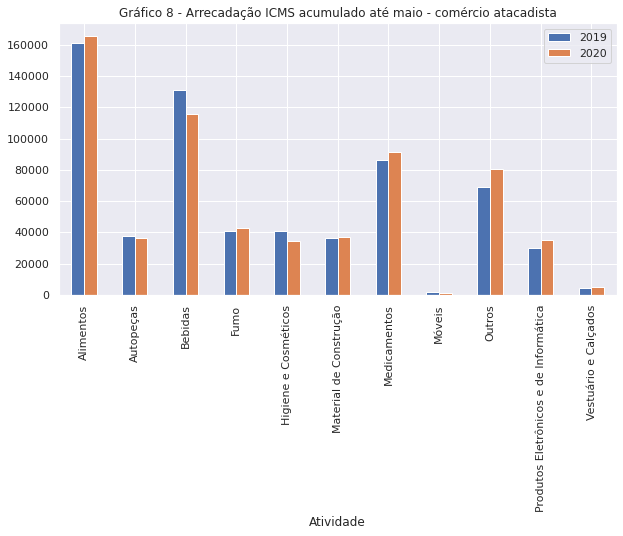

In [ ]:
#Analisando Comércio Atacadista na pandemia - ICMS
catacado = ((((df1[df1['Conta sintetica'] == 'COMÉRCIO ATACADISTA']).iloc[:,2:]).set_index("Atividade")).T).reset_index()
catacado["ano"] = catacado["index"].dt.year
catacado["mês"] = catacado["index"].dt.month

ca2019 = (catacado[(catacado['ano']== 2019) & (catacado['mês'] <=5 )]).iloc[:,:12]
ca2020 = (catacado[(catacado['ano']== 2020) & (catacado['mês'] <=5 )]).iloc[:,:12]

graf8 = pd.concat([ca2019.sum(),ca2020.sum()],axis=1).plot.bar(figsize=(10,5))
graf8.legend(["2019", "2020"])
graf8.set_title('Gráfico 8 - Arrecadação ICMS acumulado até maio - comércio atacadista');


In [ ]:
#Tabela 5 - Arrecadação do ICMS do Comércio Atacadista acumulado até maio - 2019 e 2020
caac2019 = pd.DataFrame(data=(ca2019.sum()), columns=['acumulado até maio-19'])
caac2020 = pd.DataFrame(data=(ca2020.sum()), columns=['acumulado até maio-20'])

catab = pd.concat([caac2019, caac2020], axis=1, join="inner")
catab['Variação R$'] = catab['acumulado até maio-20'] - catab['acumulado até maio-19']
catab['Variação %'] = (((catab['acumulado até maio-20']*100)/catab['acumulado até maio-19'])-100)

catab.sort_values(by='Variação R$')

,acumulado até maio-19,acumulado até maio-20,Variação R$,Variação %
Atividade,,,,
Bebidas,130789.4,115422.9,-15366.5,-11.749041
Higiene e Cosméticos,40687.4,34461.8,-6225.6,-15.301051
Autopeças,37625.2,36444.4,-1180.8,-3.138322
Móveis,1791.8,1405.0,-386.8,-21.587231
Vestuário e Calçados,4039.7,4709.0,669.3,16.568062
Material de Construção,36149.6,36958.2,808.6,2.236816
Fumo,40746.0,42752.6,2006.6,4.924655
Alimentos,160811.1,165632.6,4821.5,2.998238
Produtos Eletrônicos e de Informática,29849.8,34850.0,5000.2,16.751201


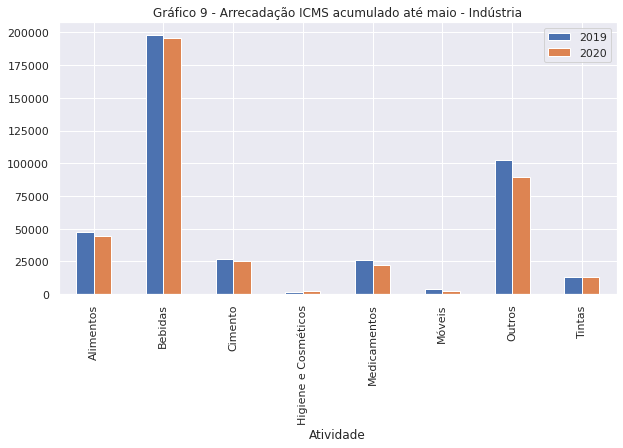

In [ ]:
#Analisando Industria na pandemia - ICMS
industria = ((((df1[df1['Conta sintetica'] == 'INDÚSTRIA']).iloc[:,2:]).set_index("Atividade")).T).reset_index()

industria["ano"] = industria["index"].dt.year
industria["mês"] = industria["index"].dt.month

ind2019 = (industria[(industria['ano']== 2019) & (industria['mês'] <=5 )]).iloc[:,:9]
ind2020 = (industria[(industria['ano']== 2020) & (industria['mês'] <=5 )]).iloc[:,:9]

graf9 = pd.concat([ind2019.sum(),ind2020.sum()],axis=1).plot.bar(figsize=(10,5))
graf9.legend(["2019", "2020"])
graf9.set_title('Gráfico 9 - Arrecadação ICMS acumulado até maio - Indústria');

In [ ]:
#Tabela 6 - Arrecadação do ICMS da Indústria acumulado até maio - 2019 e 2020
indac2019 = pd.DataFrame(data=(ind2019.sum()), columns=['acumulado até maio-19'])
indac2020 = pd.DataFrame(data=(ind2020.sum()), columns=['acumulado até maio-20'])

indtab = pd.concat([indac2019, indac2020], axis=1, join="inner")
indtab['Variação R$'] = indtab['acumulado até maio-20'] - indtab['acumulado até maio-19']
indtab['Variação %'] = (((indtab['acumulado até maio-20']*100)/indtab['acumulado até maio-19'])-100)

indtab.sort_values(by='Variação R$')

,acumulado até maio-19,acumulado até maio-20,Variação R$,Variação %
Atividade,,,,
Outros,102527.7,89891.0,-12636.7,-12.325157
Medicamentos,25763.1,22219.0,-3544.1,-13.756497
Alimentos,47775.1,44537.3,-3237.8,-6.777171
Bebidas,197745.5,195415.7,-2329.8,-1.178181
Cimento,26753.4,25295.6,-1457.8,-5.449027
Móveis,4018.3,2685.9,-1332.4,-33.158301
Higiene e Cosméticos,2009.3,2258.7,249.4,12.412283
Tintas,12999.8,13370.4,370.6,2.850813


###ISS

As maiores arrecadações do ISS são relativas aos serviços oferecidos por instituições financeiras e de seguro, seguido pelos serviços de informática e os serviços de saúde e veterinária, conforme evidenciado no Gráfico 10.

A arrecadação dos serviços de instituições financeiras e seguros chegaram a crescer aproximadamente 5% em maio de 2020 quando comparado com o mesmo periodo do ano anterior (ambos acumulados), ou seja, cresceu mesmo no período da pandemia.

Já a arrecadação com os serviços de informática foi o que mais obteve queda na arrecadação, de -28%, seguido pela queda na arrecação relativo aos serviços de comunicação onerosa (-23%).



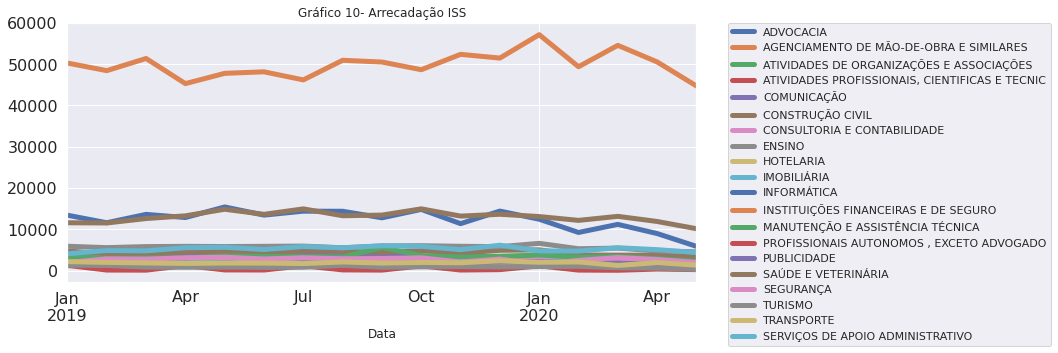

In [166]:
sns.set()
ISSdf.plot(x="Data", y=["ADVOCACIA","AGENCIAMENTO DE MÃO-DE-OBRA E SIMILARES",
                             "ATIVIDADES DE ORGANIZAÇÕES E ASSOCIAÇÕES","ATIVIDADES PROFISSIONAIS, CIENTIFICAS E TECNIC",
                             "COMUNICAÇÃO","CONSTRUÇÃO CIVIL","CONSULTORIA E CONTABILIDADE","ENSINO","HOTELARIA",
                             "IMOBILIÁRIA","INFORMÁTICA","INSTITUIÇÕES FINANCEIRAS E DE SEGURO",
                             "MANUTENÇÃO E ASSISTÊNCIA TÉCNICA","PROFISSIONAIS AUTONOMOS , EXCETO ADVOGADO",
                             "PUBLICIDADE","SAÚDE E VETERINÁRIA","SEGURANÇA","TURISMO","TRANSPORTE",
                             "SERVIÇOS DE APOIO ADMINISTRATIVO"], figsize=(15,5),linewidth=5, fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Gráfico 10- Arrecadação ISS')
plt.tight_layout()
plt.show()

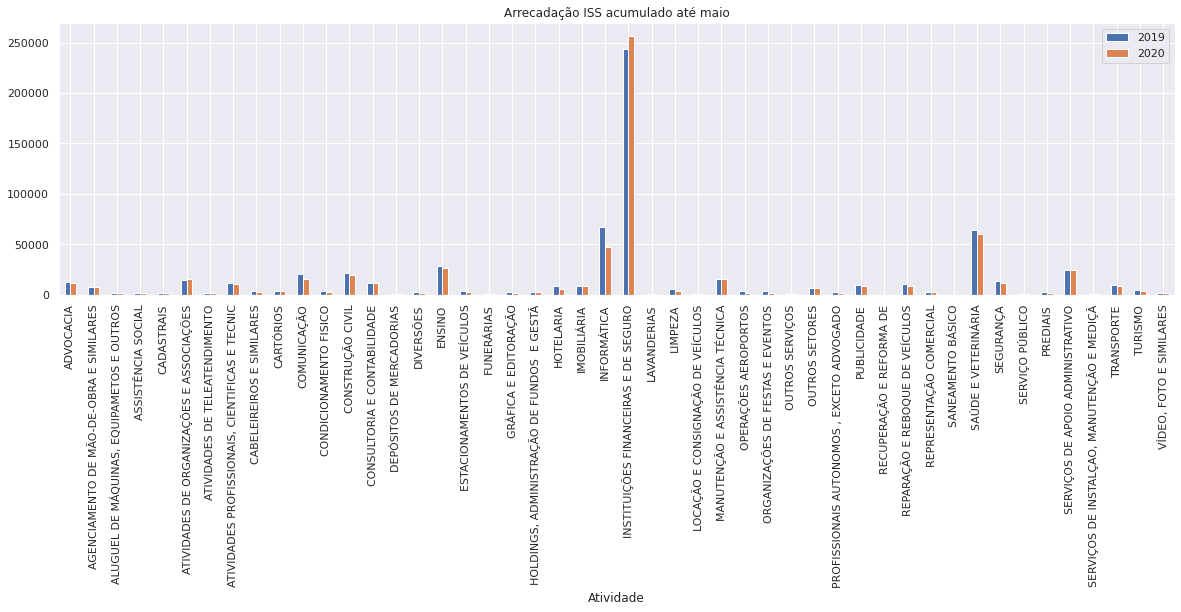

In [ ]:
ISSdf["mês"] = ISSdf["Data"].dt.month
ISSdf["ano"] = ISSdf["Data"].dt.year

iss2019 = (ISSdf[(ISSdf['ano']== 2019) & (ISSdf['mês'] <=5 )]).iloc[:,:49]
iss2020 = (ISSdf[(ISSdf['ano']== 2020) & (ISSdf['mês'] <=5 )]).iloc[:,:49]

grafiss = pd.concat([iss2019.sum(),iss2020.sum()],axis=1).plot.bar(figsize=(20,5))
grafiss.legend(["2019", "2020"])
grafiss.set_title('Arrecadação ISS acumulado até maio');

In [ ]:
#Tabela 7 - Arrecadação do ISS acumulado até maio - 2019 e 2020
issac2019 = pd.DataFrame(data=(iss2019.sum()), columns=['acumulado até maio-19'])
issac2020 = pd.DataFrame(data=(iss2020.sum()), columns=['acumulado até maio-20'])

isstab = pd.concat([issac2019, issac2020], axis=1, join="inner")
isstab['Variação R$'] = isstab['acumulado até maio-20'] - isstab['acumulado até maio-19']
isstab['Variação %'] = (((isstab['acumulado até maio-20']*100)/isstab['acumulado até maio-19'])-100)

(isstab.sort_values(by='Variação R$')).head(5)


,acumulado até maio-19,acumulado até maio-20,Variação R$,Variação %
Atividade,,,,
INFORMÁTICA,66866.8,47688.15,-19178.65,-28.681872
COMUNICAÇÃO,20325.5,15487.11,-4838.39,-23.804531
SAÚDE E VETERINÁRIA,63830.4,60414.75,-3415.65,-5.351134
HOTELARIA,8698.0,5549.59,-3148.41,-36.196942
LIMPEZA,6262.3,3550.32,-2711.98,-43.306453


In [ ]:
(isstab.sort_values(by='Variação R$')).tail(5)

,acumulado até maio-19,acumulado até maio-20,Variação R$,Variação %
Atividade,,,,
ATIVIDADES DE ORGANIZAÇÕES E ASSOCIAÇÕES,15152.0,15352.19,200.19,1.321212
"HOLDINGS, ADMINISTRAÇÃO DE FUNDOS E GESTÃ",2497.5,2745.87,248.37,9.944745
FUNERÁRIAS,852.9,1107.05,254.15,29.798335
OUTROS SERVIÇOS,885.3,1242.51,357.21,40.349034
INSTITUIÇÕES FINANCEIRAS E DE SEGURO,243177.0,256390.26,13213.26,5.433598


##Considerações

A pandemia teve fortes impactos na economia do país e no Distrito Federal não foi diferente.

A administração pública tem duas maneiras de se financiar: com a arrecadação de impostos ou com lançamento de títulos de dívida pública.

Esta análise buscou entender o comportamento da economia através das receitas tributárias de impostos.

O financiamento em relação as receitas de impostos do Distrito Federal depende em grande medida da arrecadação da receita de ICMS que representa aproximadamente 50% do total de arrecadação de impostos do ente.

A queda no faturamento do ICMS deu-se principalmente em decorrência da queda na arrecadação de combustíveis, que representa 22% da receita total e caiu -23% em maio de 2020 quando comparado ao acumulado em maio de 2019.

Também houve forte queda no comércio varejista representada principalmente pela diminuição da arrecadação de Bares,restaurantes e lanchonetes (-34%) e comércio não detalhado, definido como "outros" (-16%).

O ISS, que representa 12% da arrecadação total de impostos, é financiado em grande parte por serviços de instuições financeiras e de seguros,seguido pela arrecadação dos serviços prestados de informática e saúde e veterinária.

Apesar da arrecadação dos serviços de instituições financeiras terem crescido 5% até maio de 2020 (acumulado) quando comparado ao mesmo período do ano anterior, a arrecadação de serviços de informática caiu -28%.

Com a baixa de financiamento via impostos e a dificuldade na venda de títulos de divida pública, o DF encontra dificuldades pra se financiar e injetar dinheiro na economia.

Cumpre salientar que essa é uma análise parcial que pode ser incrementada com uma análise do comércio informal,dentre outras.

Autora: Carmen Scartezini. Analista de dados.